In [1]:
%matplotlib inline

/home/yuanpu/local/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# The following two is for Muscle Segmentation

In [2]:
# -*- coding: utf-8 -*-
import sys
import os
os.environ['KERAS_BACKEND'] = 'theano'
#os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['THEANO_FLAGS'] = 'device=gpu3,optimizer=fast_run,force_device=True, allow_gc=True'
CopyRoot  = os.path.join('..','..','..','..')
projroot = os.path.join('..','..')
#dataroot = os.path.join(CopyRoot,'WorkStation','MIA_stru', 'Data')
dataroot = os.path.join(projroot, 'Data')

test_type = 'fcn'
kerasversion = 'keras-1'
sys.path.insert(0, os.path.join(CopyRoot, 'Code', kerasversion))
sys.path.insert(0, os.path.join(CopyRoot, 'Code', kerasversion,'keras'))
sys.path.insert(0, os.path.join(CopyRoot, 'Code', kerasversion,'keras','layers'))
sys.path.insert(0, '..')
sys.path.insert(0,  os.path.join('..', 'proj_utils') )

from local_utils import *

from testingclass import runtestImg
import warnings
import time

from proj_utils.keras_utils import elu


#modelname = 'MixModel'
#from kerasOneModel import buildMixModel as buildmodel
#activ = 'relu'

modelname = 'down_to_3_muscle'
from kerasOneModel import buildMuscleSegModel as buildmodel
activ = elu(alpha=1.0)  

#modelname = 'deep_muscle_fcn'
#from kerasOneModel import buildCellSegModel as buildmodel
#activ = elu(alpha=1.0)  

#weights_name = 'weights_maker_great.h5'
weights_name = 'weights.h5'
#weights_name = 'weights_0.17.h5'
#weights_name = 'weights_b4adadelta.h5'
#weights_name = 'weights_good_friday.h5'
#weights_name = 'weights_almostFinal.h5'

warnings.filterwarnings("ignore")

def writeResults(coordinates, filepath):
    N = coordinates.shape[0]
    with open(filepath, 'w') as rf:
        rf.write(str(N) + '\n')
        rf.write(str(N) + '\n')
        rf.write(str(N) + '\n') 
        for line in coordinates:
            rf.write(" ".join(map(str, line)) + '\n' ) 
    rf.close()

def load_weights(strumodel =None, modelbasefolder = None, dataset = 'Mixture', modelname='dilated_residual_fcn'):
    weightspath = os.path.join(modelbasefolder, dataset,modelname,weights_name )
    strumodel.load_weights(weightspath)
    return strumodel
    

def seg_fn(imgfile, model=None, windowsize = 1000, batch_size = 2, linewidth = 7,color=[0,1,0]):
    #this function is for web interface  
    classparams = {'test_type':test_type}
    
    tester = runtestImg(classparams)
    if isinstance(imgfile, str):
       orgImg = imread(imgfile)
    else:
       orgImg = imgfile
    TestingFunc = tester.shortCut_FCN
    mask = TestingFunc(orgImg.copy(), model = model,windowsize = windowsize, batch_size = batch_size, linewidth = linewidth, color= color)
    #mask = tester.printMask(img= orgImg.copy(), mask=mask)
    return mask
    
def setpath(KerasRoot):
    sys.path.insert(0, os.path.join(KerasRoot))
    sys.path.insert(0, os.path.join(KerasRoot,'keras'))
    sys.path.insert(0, os.path.join(KerasRoot,'keras','layers'))
        
if __name__ == "__main__":
    # the following are just for default testing
    
    modelbasefolder = os.path.join(projroot, 'Data', 'Model')      
    
    #modelname = 'dilated_fcn'
    
    
    dataset = 'Muscle'    
    filepath = 'cord.txt'
    

   
    if len(sys.argv) >= 4:       
       imgfile, filepath, KerasRoot, modelbasefolder = sys.argv[1], sys.argv[2], sys.argv[3], sys.argv[4]   
       setpath(KerasRoot)
    if  1 or not 'strumodel' in globals():
       strumodel = buildmodel(img_channels = 3,activ=activ)   
       strumodel = load_weights(strumodel = strumodel,modelbasefolder = modelbasefolder, modelname = modelname, dataset = dataset)

    print "Finihsed compilation!"

Using Theano backend.
Using gpu device 3: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


Finihsed compilation!


In [282]:
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','3.bmp')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','Bmal1 WT#1-2.jpg') 
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','983 Rta L2-4.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','525.JPEG')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','983 tri-1.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','Bmal1 KO#21-5.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','dup2+GC H&E-1_1.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','525.JPEG')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','428.bmp')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','12.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','1.png')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','40_1.JPEG')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','19.bmp')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','3_2.JPEG')

In [3]:
from skimage.color import label2rgb

#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','Bmal1 WT#2-1.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','Bmal1 KO#19-2.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','Bmal1 KO#7-2.bmp')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','3.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','6.bmp')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','5.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','7.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','17.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','724.bmp')

#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','1.bmp')
imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','2.bmp')
imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','6.bmp')


#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','649.bmp')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','Bmal1 KO#21-5.jpg')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','img_mask2.bmp')

#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','617.JPEG')
#imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','3203 GAS Dup2_10x_1_AdjDyLaDa_Crop.tif')
imgfile = os.path.join(projroot, 'Data', 'imgsForDemo','imgs_muscle','8.tif')
classparams = {'test_type':test_type}
tester = runtestImg(classparams)

TestingFunc = tester.get_coordinate

#coordinates = TestingFunc(imgfile, model = strumodel)
start = time.time()
img_org = imread(imgfile)
img_res = imresize(img_org, 1)

overlaiedImg = seg_fn(img_res, model = strumodel)
print time.time() - start    
#imshow(overlaiedImg)

# overlaiedImg = seg_fn(img_org, model = strumodel)
#imshow(overlaiedImg)

#img_org = imread(imgfile)
# img = pre_process_img(img_org.copy(), yuv = False, mode='rescale')

# print np.max(img[:])
# imshow(img_org.astype('float')/255)

print 'Computation Done!'



Finished making prediction function.
7.27444720268
Computation Done!


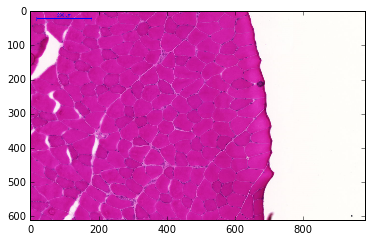

(612, 982, 3)


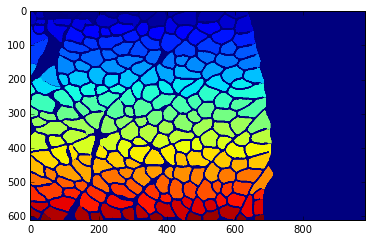

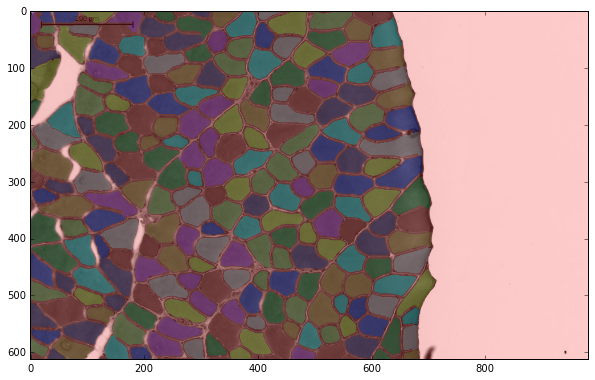

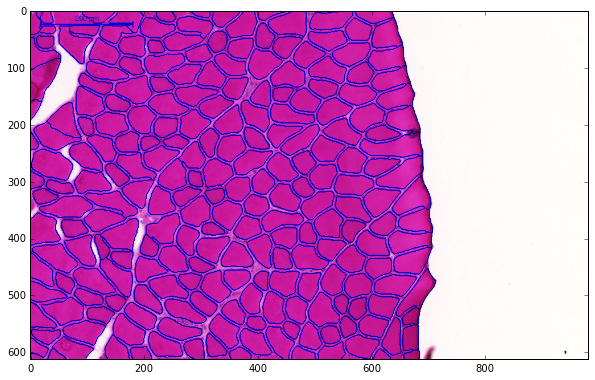

In [6]:
single = False
img_res = img_res.astype(np.uint8)
imshow(img_res)

print img_org.shape
if single:
    markers_single = single_watershed(overlaiedImg,thresh_water = 0.8, thresh_seg = 0.3,ratio = 0.2)
    imshow(markers_single)
    imshow(label2rgb(markers_single,img_res, alpha=0.2), (10,10))
    contourMarkeredImg = label2contour(img_res, markers_single)
    imshow( contourMarkeredImg, (10,10))
else:   
    markers_overral = overal_watershed(overlaiedImg,thresh_water = 0.8, thresh_seg = 0.3,ratio = 0.2)
    imshow(markers_overral)
    #imshow(label2rgb(markers_overral,img_org, alpha=0.3), (10,10))
    imshow(label2rgb(markers_overral,img_res, alpha=0.2), (10,10))
    contourMarkeredImg = label2contour(img_res, markers_overral)
    imshow( contourMarkeredImg, (10,10))


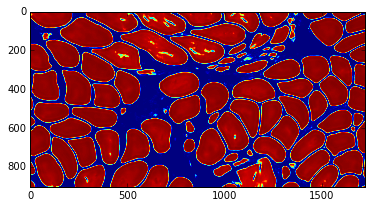

In [7]:
imshow(overlaiedImg)

In [5]:
import cv2
import scipy
from   skimage.feature import peak_local_max
from   skimage import data

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage import io
from local_utils import *
import numpy as np
from skimage import measure
from skimage.filters import frangi

from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

def make_img(prob, thresh_hold = 0.5):
    thresh = prob > thresh_hold
    thresh = scipy.ndimage.binary_fill_holes(thresh)
    thresh = (thresh*255).astype(np.uint8)
    cv3Thresh = cv2.cvtColor(thresh.astype('uint8'),cv2.COLOR_GRAY2RGB)    
    return cv3Thresh, thresh

def get_thresh(dist_transform):
    return np.max(dist_transform)
#     dist_transform = scipy.ndimage.filters.gaussian_filter(dist_transform, sigma = 2)
#     #ret, sure_fg = cv2.threshold(dist_transform,ratio*dist_f(dist_transform),255,0)
#     coordinates = peak_local_max(dist_transform, min_distance= 7, indices = True) # N by 2,
#     all_peaks = dist_transform[coordinates[:,0],coordinates[:,1] ].flatten()
#     num_peaks = all_peaks.size
#     k = min(num_peaks-1, int(num_peaks* 0.999)) # means we want the top 10 percent peaks
#     rval = np.partition(all_peaks, k)[k]
#     return rval
    

def overal_watershed_(probmap, thresh_water = 0.6, thresh_seg = 0.5,ratio = 0.2, dist_f = np.median):
    npad2 = ((1,1),(1,1))
    probmap = np.pad(probmap, npad2, mode='constant', constant_values=0)
    

    ret, fg_mask = cv2.threshold(probmap.astype(np.float32),0.7,255,0)
    ret, seed_mask = cv2.threshold(probmap.astype(np.float32),0.7,255,0)
    marker[seed_mask == 0] = 0
    ret, markers = cv2.connectedComponents(marker)
    
    fg_mask_color = cv2.cvtColor(fg_mask.astype('uint8'),cv2.COLOR_GRAY2RGB)
    markers = cv2.watershed(fg_mask_color, markers)

    remove_boarder_marker = markers[1:-1, 1:-1]
    return remove_boarder_marker

def _watershed(probmap, props,thresh_water = 0.8, thresh_seg = 0.2,ratio = 1, dist_f = np.max):
    if len(probmap.shape) ==2:
        npad2 = ((1,1),(1,1))
        probmap = np.pad(probmap, npad2, mode='constant', constant_values=0)
        cv3Thresh, thresh =  make_img(probmap, thresh_water * np.max(probmap))
        water_cv3Thresh, _ = make_img(probmap, thresh_seg * np.max(probmap))
    else:
        npad = ((1,1),(1,1),(0,0))
        probmap = np.pad(probmap, npad, mode='constant', constant_values=0)
        cv3Thresh = probmap.astype(np.uint8)
        thresh = cv3Thresh[...,0]
        water_cv3Thresh = probmap.astype(np.uint8)
        
    kernel = np.ones((3,3)).astype(np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=6)
    #imshow(sure_bg)
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    dist_transform[dist_transform < 0.1*np.max(dist_transform)] = 0    
    #imshow(dist_transform)
    #ret, sure_fg = cv2.threshold(dist_transform,ratio*dist_f(dist_transform),255,0)
    
    #print props.eccentricity
    dist_transform = scipy.ndimage.filters.gaussian_filter(dist_transform, sigma = 2)
    if props.eccentricity >= 0.85:
        ret, sure_fg = cv2.threshold(dist_transform,ratio*dist_f(dist_transform),255,0)
    else:
        ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_f(dist_transform),255,0)
        dist_transform[sure_fg == 0] = 0 
        #imshow(dist_transform)
        coordinates = peak_local_max(dist_transform, min_distance= 9, indices = True) # N by 2,
        #print coordinates.shape
        sure_fg = np.zeros_like(dist_transform)
        sure_fg[coordinates[:,0],coordinates[:,1] ] = 1
        
    # Finding unknown region
    sure_fg = (sure_fg).astype(np.uint8)
    
    unknown = cv2.subtract(sure_bg,sure_fg)
    #imshow(unknown)
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    #imshow(markers)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    markers = cv2.watershed(water_cv3Thresh,markers)
    
    remove_boarder_marker = markers[1:-1, 1:-1]
    return remove_boarder_marker

def one_pass_watershed(probmap, thresh_water = 0.8, thresh_seg = 0.2,ratio = 0.2, dist_f = np.median, use_frangi= True):
    npad2 = ((1,1),(1,1))
    probmap = np.pad(probmap, npad2, mode='constant', constant_values=0)
    cv3Thresh, thresh =  make_img(probmap, thresh_water )
    ######
    #ret, thresh = cv2.threshold(probmap.astype(np.float32),thresh_water,255,0)
    #print thresh.shape
    #cv3Thresh = cv2.cvtColor(thresh.astype('uint8'),cv2.COLOR_GRAY2RGB)
    
    ret, fg_mask = cv2.threshold(probmap.astype(np.float32),thresh_seg,255,0)
    water_cv3Thresh = cv2.cvtColor(fg_mask.astype('uint8'),cv2.COLOR_GRAY2RGB)
    ######
    
    if use_frangi:
        edge = frangi(thresh)     
    else:
        edge = np.zeros_like(thresh)

    boundaries = edge > 0.01 * np.max(edge)
    cv3Thresh[edge > 0.2 * np.max(edge), :] = 0

    #imshow(boundaries)
    #water_cv3Thresh, _ = make_img(probmap, thresh_seg )
    kernel = np.ones((3,3)).astype(np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    opening[boundaries == 1] = 0
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=6)
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    #imshow(dist_transform)
    ret, sure_fg = cv2.threshold(dist_transform, ratio*get_thresh(dist_transform),255,0) 
    #imshow(sure_fg)
    # Finding unknown region
    sure_fg = (sure_fg).astype(np.uint8)
    
    unknown = cv2.subtract(sure_bg,sure_fg)
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    #imshow(markers)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    markers[boundaries == 1] = 0

    markers = cv2.watershed(water_cv3Thresh,markers)
    remove_boarder_marker = markers[1:-1, 1:-1]
    return remove_boarder_marker


def overal_watershed(probmap, thresh_water = 0.8, thresh_seg = 0.2, ratio = 0.2, dist_f = np.median):
    first_pass = one_pass_watershed(probmap, thresh_water = thresh_water,
                                    thresh_seg = thresh_seg, ratio = ratio, dist_f = dist_f)
    residule = probmap.copy()
    residule[first_pass != 1] = 0
    second_ratio = ratio
    second_pass = one_pass_watershed(residule, thresh_water = thresh_water, use_frangi = False,
                                    thresh_seg = thresh_seg, ratio = second_ratio, dist_f = dist_f)
    
    #tmp_img, _ = make_img(np.zeros_like(first_seg))
    new_seg = np.zeros_like(first_pass)
    
    region_count = 1
    
    first_regions = regionprops(first_pass)[1:]
    second_regions = regionprops(second_pass)[1:]
    
    for props in first_regions :
        if props.area < 200:
            pass
        else:
            new_seg[first_pass ==  props.label] = region_count
            region_count = region_count + 1
    for props in second_regions :
        if props.area < 200:
            pass
        else:
            new_seg[second_pass ==  props.label] = region_count
            region_count = region_count + 1
            
    return new_seg       


def single_watershed(probmap, thresh_water = 0.8, thresh_seg = 0.2,ratio = 0.3, dist_f = np.max):
    
    first_seg = overal_watershed(probmap, thresh_water = thresh_water,ratio = ratio, 
                                 dist_f = dist_f, thresh_seg = thresh_seg)
    label_img = first_seg
    regions = regionprops(label_img)
    #tmp_img, _ = make_img(np.zeros_like(first_seg))
    tmp_img = np.zeros_like(first_seg)
    new_seg = np.zeros_like(first_seg)
    
    region_count = 1
    for props in regions[1:]:
        if props.area < 50:
            pass
        elif props.solidity > 0.9:
            new_seg[label_img ==  props.label] = region_count
            region_count = region_count + 1
        else:
            minr, minc, maxr, maxc = props.bbox
            tmp_img[label_img ==  props.label] = 255   
            thispatch = tmp_img[minr:maxr, minc:maxc].copy()
            #print thispatch.shape
            temp_seg = _watershed(thispatch, props, ratio=0.5, thresh_water = 0.5, 
                                        thresh_seg = 0.5,dist_f = np.max)
            tmp_img[minr:maxr, minc:maxc] = temp_seg
            #imshow(temp_seg)
            for tmp_props in regionprops(temp_seg)[1:]:
                if tmp_props.area >= 50:
                    new_seg[tmp_img ==  tmp_props.label] = region_count
                    region_count = region_count + 1   
            tmp_img.fill(0)
            
    return new_seg

In [388]:
import numpy as np
import random
x = [1, 2, 3, 4, 5, 6]
random.seed(4)
random.shuffle(x)
print x

[4, 3, 5, 6, 1, 2]
